In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
df = pd.read_csv('D:\\Machine learning\\ML-Project\\Empolyee Data Prediction\\dataset\\EmployeeChurn_CleanData.csv')
df.head()

,Unnamed: 0,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,3,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
4,4,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11991 non-null  int64  
 1   satisfactoryLevel      11991 non-null  float64
 2   lastEvaluation         11991 non-null  float64
 3   numberOfProjects       11991 non-null  int64  
 4   avgMonthlyHours        11991 non-null  int64  
 5   timeSpent.company      11991 non-null  int64  
 6   workAccident           11991 non-null  int64  
 7   left                   11991 non-null  int64  
 8   promotionInLast5years  11991 non-null  int64  
 9   salary                 11991 non-null  int64  
 10  dept_RandD             11991 non-null  int64  
 11  dept_accounting        11991 non-null  int64  
 12  dept_hr                11991 non-null  int64  
 13  dept_management        11991 non-null  int64  
 14  dept_marketing         11991 non-null  int64  
 15  de

In [70]:
df.isnull().sum()

Unnamed: 0               0
satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
salary                   0
dept_RandD               0
dept_accounting          0
dept_hr                  0
dept_management          0
dept_marketing           0
dept_product_mng         0
dept_sales               0
dept_support             0
dept_technical           0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [72]:
df.shape

(11991, 19)

In [73]:
df.columns

Index(['Unnamed: 0', 'satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'salary', 'dept_RandD', 'dept_accounting',
       'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng',
       'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [74]:
# df.drop(columns=['salary_encoded'],axis=1)

In [75]:
X = df.drop(columns=['left'],axis=1)
y = df['left']

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled =  scaler.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [78]:
X_train.shape,X_test.shape

((9592, 18), (2399, 18))

In [79]:
y_train.shape,y_test.shape

((9592,), (2399,))

In [80]:
# Logistic Regerssion
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
y_pred = lr.predict(X_test)

In [82]:
from sklearn.metrics import *

print('Test Accuracy Score ',accuracy_score(y_test,y_pred))
print("Confusion_Metric",confusion_matrix(y_test,y_pred))
print('Classification_report',classification_report(y_test,y_pred))
print('R2_Score',r2_score(y_test,y_pred))

Test Accuracy Score  0.8657774072530221
Confusion_Metric [[1929   72]
 [ 250  148]]
Classification_report               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2001
           1       0.67      0.37      0.48       398

    accuracy                           0.87      2399
   macro avg       0.78      0.67      0.70      2399
weighted avg       0.85      0.87      0.85      2399

R2_Score 0.03003523363946181


In [83]:
# DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred = decision.predict(X_test)

In [85]:
print('Test Accuracy Score ',accuracy_score(y_test,y_pred))
print("Confusion_Metric",confusion_matrix(y_test,y_pred))
print('Classification_report',classification_report(y_test,y_pred))
print('R2_Score',r2_score(y_test,y_pred))

Test Accuracy Score  0.9879116298457691
Confusion_Metric [[1984   17]
 [  12  386]]
Classification_report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.97      0.96       398

    accuracy                           0.99      2399
   macro avg       0.98      0.98      0.98      2399
weighted avg       0.99      0.99      0.99      2399

R2_Score 0.9126429247687714


In [86]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_estimators=110,random_state=42)
Rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=110, random_state=42)

In [87]:
y_pred_rf = Rf_model.predict(X_test)

In [88]:
print('Classification Report',classification_report(y_test,y_pred_rf))
print('Accuracy Score',accuracy_score(y_test,y_pred_rf))
print('R2 Score',r2_score(y_test,y_pred_rf))

Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       1.00      0.97      0.98       398

    accuracy                           0.99      2399
   macro avg       1.00      0.98      0.99      2399
weighted avg       0.99      0.99      0.99      2399

Accuracy Score 0.9941642350979575
R2 Score 0.9578276188538897


In [89]:
# Xgboost 
import xgboost as xgb
boost = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
boost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [90]:
y_pred_xgb = boost.predict(X_test)
print('Classification Report',classification_report(y_test,y_pred_xgb))
print('Accuracy Score',accuracy_score(y_test,y_pred_xgb))
print('R2 Score',r2_score(y_test,y_pred_xgb))

Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.99      0.97      0.98       398

    accuracy                           0.99      2399
   macro avg       0.99      0.98      0.99      2399
weighted avg       0.99      0.99      0.99      2399

Accuracy Score 0.9929137140475198
R2 Score 0.948790680036866


In [91]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]

print('accuracy:',accuracy_score(y_test, y_pred))
print('conf_matrix:',confusion_matrix(y_test, y_pred))
print('class_report:',classification_report(y_test, y_pred))
print('R2 Score:',r2_score(y_test,y_pred_prob))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
accuracy: 0.992080033347228
conf_matrix: [[1994    7]
 [  12  386]]
class_report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.98      0.97      0.98       398

    accuracy                           0.99      2399
   macro avg       0.99      0.98      0.99      2399
weighted avg       0.99      0.99      0.99      2399

R2 Score: 0.9570255875587463


In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Test Set Accuracy: {accuracy}')


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Set Accuracy: 0.9941642350979575


In [93]:
feature_im = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=True)
feature_im
 

dept_product_mng         0.000228
promotionInLast5years    0.000318
dept_accounting          0.000389
dept_management          0.000402
dept_marketing           0.000423
dept_RandD               0.000487
dept_support             0.000542
dept_hr                  0.000583
dept_technical           0.000629
dept_sales               0.000708
salary                   0.002899
workAccident             0.004188
lastEvaluation           0.058393
timeSpent.company        0.080552
avgMonthlyHours          0.085874
numberOfProjects         0.114982
satisfactoryLevel        0.202010
Unnamed: 0               0.446392
dtype: float64

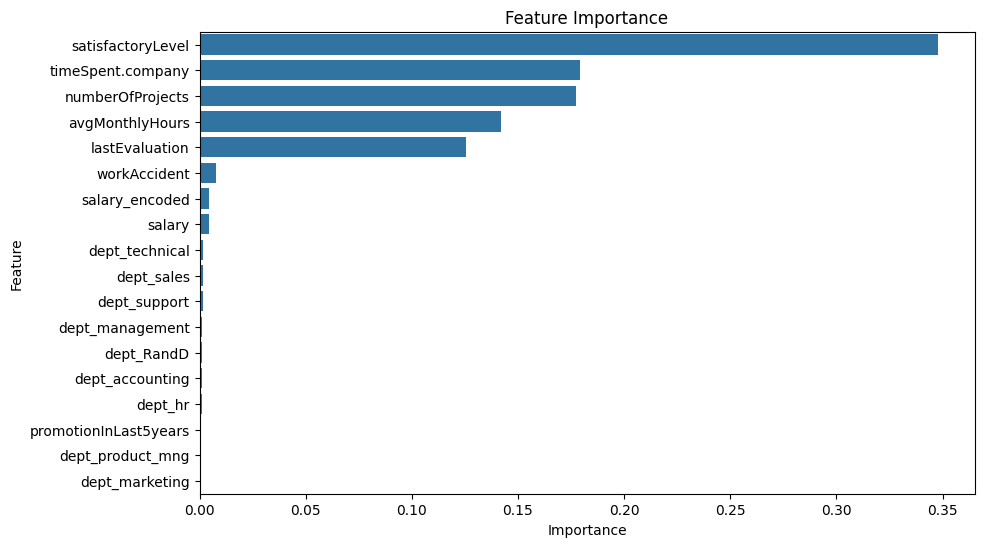

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance data
data = {
    'Feature': [
        'satisfactoryLevel', 'timeSpent.company', 'numberOfProjects', 
        'avgMonthlyHours', 'lastEvaluation', 'workAccident', 'salary_encoded', 
        'salary', 'dept_technical', 'dept_sales', 'dept_support', 'dept_management', 
        'dept_RandD', 'dept_accounting', 'dept_hr', 'promotionInLast5years', 
        'dept_product_mng', 'dept_marketing'
    ],
    'Importance': [
        0.347699, 0.179291, 0.177220, 0.142116, 0.125342, 0.007936, 0.004434, 
        0.004229, 0.001649, 0.001639, 0.001510, 0.001330, 0.001128, 0.001069, 
        0.001066, 0.000851, 0.000754, 0.000740
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Based on the feature importance values provided, the features that contribute the most to your model are:

1. **satisfactoryLevel**: 0.347699
2. **timeSpent.company**: 0.179291
3. **numberOfProjects**: 0.177220
4. **avgMonthlyHours**: 0.142116
5. **lastEvaluation**: 0.125342

These features have the highest importance scores and thus contribute the most to the predictive model. and remove other features 

In [95]:
X = X[['satisfactoryLevel','lastEvaluation','numberOfProjects','avgMonthlyHours','timeSpent.company','workAccident','promotionInLast5years','salary']]

In [96]:
X

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,salary
0,0.38,0.53,2,157,3,0,0,0
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.37,0.52,2,159,3,0,0,0
4,0.41,0.50,2,153,3,0,0,0
...,...,...,...,...,...,...,...,...
11986,0.30,0.88,5,245,4,0,0,0
11987,0.99,0.83,4,274,2,0,0,0
11988,0.72,0.72,4,175,4,0,0,0
11989,0.24,0.91,5,177,5,0,0,0


In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [98]:
X_train.shape,X_test.shape 

((9592, 8), (2399, 8))

In [99]:
y_train.shape,y_train.shape

((9592,), (9592,))

In [100]:
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier()

Rf_model.fit(X_train,y_train)
y_pred_rf = Rf_model.predict(X_test)

## Accuracy 

from sklearn.metrics import *
print("Accuracy Score: ",accuracy_score(y_test,y_pred_rf))
print("Confusion Metric: ",confusion_matrix(y_test,y_pred_rf))
print("Classification report: ",classification_report(y_test,y_pred_rf))
print("R2 score: ",r2_score(y_test,y_pred_rf))

Accuracy Score:  0.9845769070446019
Confusion Metric:  [[1999    2]
 [  35  363]]
Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.91      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

R2 score:  0.8885444212567084


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Test Set Accuracy: {accuracy}')


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Test Set Accuracy: 0.9858274280950396


In [106]:
import pickle

pickle.dump(best_rf,open('randomForest1.pkl','wb'))
print("Model saved....")

Model saved....


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent.company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   promotionInLast5years  11991 non-null  int64  
 7   salary                 11991 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 749.6 KB


In [ ]:
X.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.37,0.52,2,159,3,0,0,1
4,0.41,0.50,2,153,3,0,0,1


In [ ]:
X['salary'].value_counts()

salary
1    5740
2    5261
0     990
Name: count, dtype: int64